In [38]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets

digits = datasets.load_digits()

In [39]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [40]:
# dataset description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [41]:
# data
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [42]:
# data target
digits.target

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 640x480 with 0 Axes>

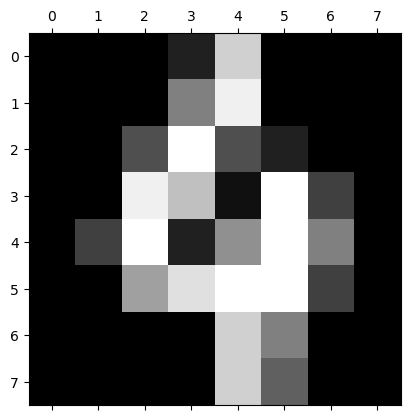

In [43]:
# visualize the data image at index 100
plt.gray()
plt.matshow(digits.images[100])
plt.show()

In [44]:
# let's check
digits.target[100]

4

### K-Means clustering
Let’s cluster the 1797 different digit images into groups.

In [45]:
from sklearn.cluster import KMeans


In [46]:
# Find the k clusters in the data
k = []
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(digits.data)
    k.append(i)
    inertia.append(kmeans.inertia_)

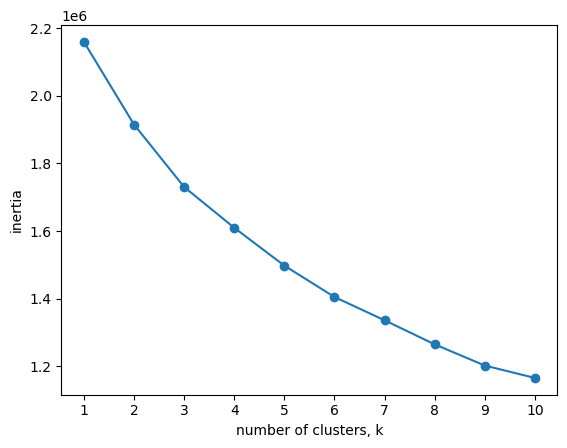

<Figure size 640x480 with 0 Axes>

In [51]:
# Plot the results
plt.plot(k, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()
plt.clf()

Visualizing after K-Means. 

Let’s visualize all the centroids! Because data samples live in a 64-dimensional space, the centroids have values so they can be images!

In [52]:
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Cluster Center Images')

<Figure size 800x300 with 0 Axes>

Scikit-learn sometimes calls centroids “cluster centers”.
The cluster centers are the mean of the points in each cluster.
Each cluster center is a row in the cluster_centers_ numpy array.
The cluster centers are also called the “centroids”.

In [54]:
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    # display images
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
# show the plot
plt.show()

why I can't see here the result?

Testing our model

In [58]:
new_sample = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.76,5.13,5.35,4.81,0.69,0.00,0.00,0.00,4.89,6.95,5.35,7.40,6.41,0.92,0.00,0.00,0.00,0.00,0.00,3.05,7.63,2.29,0.00,0.00,0.00,0.00,2.36,7.09,6.86,0.91,0.00,0.00,0.23,5.19,7.63,6.10,0.99,0.00,0.00,0.00,2.22,7.63,6.48,0.38,0.00,0.00,1.15,0.00,0.69,5.72,7.63,7.63,7.63,7.63,7.63],
[0.00,0.92,3.28,4.50,5.35,2.14,0.00,0.00,0.00,4.36,7.63,7.32,7.63,5.34,0.00,0.00,0.00,0.46,5.35,7.63,7.63,2.97,0.00,0.00,0.00,2.98,7.64,7.64,7.63,6.79,1.30,0.00,0.00,0.46,2.29,2.29,2.98,7.17,6.79,1.46,0.00,0.00,0.39,1.22,0.76,2.21,7.56,3.82,0.00,0.00,3.66,7.63,7.63,7.63,7.63,3.36,0.00,0.00,0.46,2.29,2.29,2.29,1.84,0.00],
[1.68,5.35,5.35,5.35,5.35,3.82,0.00,0.00,3.06,7.64,5.57,5.35,5.34,3.82,0.00,0.00,2.37,7.63,5.58,5.34,5.34,4.65,1.07,0.00,1.15,5.35,5.35,5.34,5.49,7.48,3.82,0.00,0.00,0.00,0.00,0.00,0.00,6.87,3.82,0.00,0.00,1.68,5.34,4.66,5.11,7.48,3.82,0.00,0.00,1.68,5.80,6.10,6.11,4.81,1.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.23,4.35,4.58,4.58,4.58,4.58,4.58,4.58,0.38,5.88,6.10,6.10,6.10,6.33,7.63,6.94,0.00,0.00,0.00,0.00,0.00,4.34,7.55,1.60,0.00,2.29,6.71,5.40,4.19,7.63,6.18,0.23,0.00,1.07,4.88,6.38,7.63,7.63,7.55,1.15,0.00,0.00,0.00,3.81,7.63,1.75,0.00,0.00,0.00,0.00,0.08,6.87,5.34,0.00,0.00,0.00,0.00,0.00,3.35,7.63,2.60,0.00,0.00,0.00]
])


In [62]:
model = KMeans(n_clusters=10, random_state=42).fit(digits.data)
new_labels = model.predict(new_sample)
new_labels


array([2, 1, 1, 8], dtype=int32)

Hum, that's not correct. The answer is 2357. But relax, the model was trained with turkish in 1900!

In [60]:
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

2997